In [139]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

%matplotlib inline

url = "https://biapi.nve.no/magasinstatistikk/api/Magasinstatistikk/HentOffentligData"
parameters = {}
# parameters = {"StationId": "6.16.0"}
response = requests.get(url, params=parameters)
magasin = json.loads(response.content)

In [140]:
df = pd.DataFrame(magasin, index=range(len(magasin)))
df['dato_Id'] = pd.to_datetime(df['dato_Id'])
df.head(10) # Don't use print so the data looks nicely 

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
0,1996-09-15,EL,3,1996,37,0.712913,9.113162,6.496893,0001-01-01T00:00:00,0.714502,-0.001589
1,1998-11-15,EL,4,1998,46,0.865621,20.820948,18.023056,0001-01-01T00:00:00,0.882200,-0.016579
2,1998-05-17,EL,1,1998,20,0.455264,5.992993,2.728392,0001-01-01T00:00:00,0.332736,0.122528
3,2019-03-03,EL,3,2019,9,0.408852,9.113162,3.725937,2019-03-13T13:00:00,0.433524,-0.024672
4,2006-09-24,EL,3,2006,38,0.672132,9.113162,6.125247,0001-01-01T00:00:00,0.664542,0.007590
5,2006-02-19,EL,3,2006,7,0.423734,9.113162,3.861558,0001-01-01T00:00:00,0.465968,-0.042233
6,2001-03-11,EL,3,2001,10,0.283224,9.113162,2.581067,0001-01-01T00:00:00,0.304985,-0.021761
7,2001-08-19,EL,3,2001,33,0.779718,9.113162,7.105692,0001-01-01T00:00:00,0.751945,0.027772
8,1996-05-05,EL,3,1996,18,0.163482,9.113162,1.489837,0001-01-01T00:00:00,0.169103,-0.005621
9,2003-08-03,EL,1,2003,31,0.785532,5.992993,4.707686,0001-01-01T00:00:00,0.783831,0.001701


## Data Representation From Territory 1

In [93]:
territory_1 = df[df["omrnr"] == 1]
territory_1 = territory_1.sort_values("dato_Id")
# territory_1 = territory_1[territory_1["dato_Id"] > "2015"]
territory_1

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
32,1995-01-08,EL,1,1995,1,0.621476,5.992993,3.724504,0001-01-01T00:00:00,0.612629,0.008848
10244,1995-01-08,VASS,1,1995,1,0.635756,35.945644,22.852660,0001-01-01T00:00:00,0.668393,-0.032637
2324,1995-01-15,EL,1,1995,2,0.583106,5.992993,3.494550,0001-01-01T00:00:00,0.621476,-0.038370
9841,1995-01-15,VASS,1,1995,2,0.604701,35.945644,21.736370,0001-01-01T00:00:00,0.635756,-0.031055
10975,1995-01-22,VASS,1,1995,3,0.585155,35.945644,21.033768,0001-01-01T00:00:00,0.604701,-0.019546
...,...,...,...,...,...,...,...,...,...,...,...
13025,2022-12-11,VASS,1,2022,49,0.729114,35.945644,26.208466,2022-12-21T13:00:00,0.771005,-0.041892
6712,2022-12-18,EL,1,2022,50,0.707440,5.992993,4.239682,2022-12-28T13:00:00,0.758484,-0.051044
13029,2022-12-18,VASS,1,2022,50,0.686971,35.945644,24.693602,2022-12-28T13:00:00,0.729114,-0.042143
6710,2022-12-25,EL,1,2022,51,0.676610,5.992993,4.054916,2023-01-04T13:00:00,0.707440,-0.030830


In [5]:
territory_1_VASS = territory_1[territory_1["omrType"] == "VASS"]
territory_1_VASS['SMA5'] = territory_1_VASS['fyllingsgrad'].rolling(5).mean()
territory_1_EL = territory_1[territory_1["omrType"] == "EL"]
territory_1_EL['SMA5'] = territory_1_EL['fyllingsgrad'].rolling(5).mean()

/var/folders/zf/m_xd54ds3msfzd78t7b0s9bh0000gp/T/ipykernel_63453/4176525296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  territory_1_VASS['SMA5'] = territory_1_VASS['fyllingsgrad'].rolling(5).mean()
/var/folders/zf/m_xd54ds3msfzd78t7b0s9bh0000gp/T/ipykernel_63453/4176525296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  territory_1_EL['SMA5'] = territory_1_EL['fyllingsgrad'].rolling(5).mean()


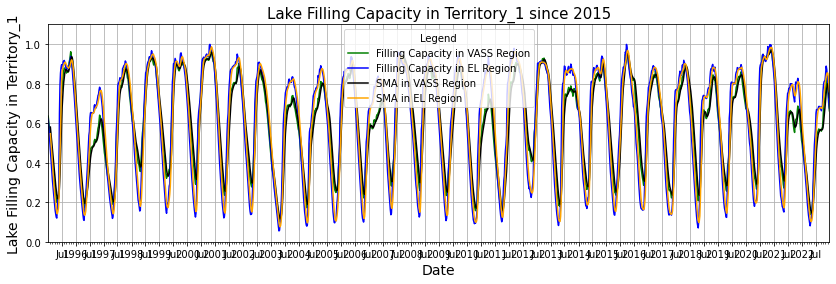

In [6]:
fig, axs = plt.subplots()
x1 = territory_1_VASS["dato_Id"]
y1 = territory_1_VASS['fyllingsgrad']
y2 = territory_1_EL['fyllingsgrad']
y3 = territory_1_VASS['SMA5']
y4 = territory_1_EL['SMA5']
plot1 = axs.plot(x1, y1, color='green', label="Filling Capacity in VASS Region")
plot2 = axs.plot(x1, y2, color='blue', label="Filling Capacity in EL Region")
plot3 = axs.plot(x1, y3, color='black', label="SMA in VASS Region")
plot4 = axs.plot(x1, y4, color='orange', label="SMA in EL Region")

axs.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
axs.xaxis.set_minor_locator(mdates.MonthLocator())
axs.xaxis.set_major_formatter(mdates.ConciseDateFormatter(axs.xaxis.get_major_locator()))
axs.set_xlabel('Date', fontsize=14)
axs.set_ylabel('Lake Filling Capacity in Territory_1', fontsize=14)
plt.title("Lake Filling Capacity in Territory_1 since 2015", fontsize=15)
plt.legend(loc=9, title="Legend")
plt.gcf().set_size_inches(14, 4)
axs.grid(True)
axs.margins(x=0)
axs.set_ylim(0, 1.1)
plt.show()

## Data Representation From Territory 2

In [9]:
df[df["omrnr"] == 2]

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
139,2012-08-26,EL,2,2012,34,0.876632,33.928802,29.743080,0001-01-01T00:00:00,0.875750,0.000882
174,2020-12-27,EL,2,2020,52,0.908910,33.928802,30.838240,2021-01-06T13:00:00,0.918413,-0.009503
245,1999-07-11,EL,2,1999,27,0.881438,33.928802,29.906130,0001-01-01T00:00:00,0.856806,0.024632
328,2000-11-05,EL,2,2000,44,0.963161,33.928802,32.678890,0001-01-01T00:00:00,0.957344,0.005817
605,2021-08-15,EL,2,2021,32,0.630184,33.928802,21.381390,2021-08-25T13:00:00,0.640608,-0.010424
...,...,...,...,...,...,...,...,...,...,...,...
13107,2022-11-13,VASS,2,2022,45,0.783846,23.261864,18.233727,2022-11-23T13:00:00,0.733982,0.049864
13108,2022-11-20,VASS,2,2022,46,0.767169,23.261864,17.845781,2022-11-30T13:00:00,0.783846,-0.016677
13115,2022-11-27,VASS,2,2022,47,0.744393,23.261864,17.315970,2022-12-07T13:00:00,0.767225,-0.022832
13116,2022-12-04,VASS,2,2022,48,0.719494,23.261864,16.736782,2022-12-14T13:00:00,0.744393,-0.024899


## Data Representation From Territory 3

In [10]:
df[df["omrnr"] == 3]

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
1,1996-09-15,EL,3,1996,37,0.712913,9.113162,6.496893,0001-01-01T00:00:00,0.714502,-0.001589
5,2010-04-18,EL,3,2010,15,0.143942,9.113162,1.311765,0001-01-01T00:00:00,0.155831,-0.011889
6,2019-03-03,EL,3,2019,9,0.408852,9.113162,3.725937,2019-03-13T13:00:00,0.433524,-0.024672
7,2006-09-24,EL,3,2006,38,0.672132,9.113162,6.125247,0001-01-01T00:00:00,0.664542,0.007590
8,2006-02-19,EL,3,2006,7,0.423734,9.113162,3.861558,0001-01-01T00:00:00,0.465968,-0.042233
...,...,...,...,...,...,...,...,...,...,...,...
13110,2022-10-02,VASS,3,2022,39,0.853142,28.093166,23.967464,2022-10-12T13:00:00,0.867402,-0.014260
13111,2022-11-20,VASS,3,2022,46,0.817928,28.093166,22.978188,2022-11-30T13:00:00,0.838374,-0.020446
13112,2022-11-27,VASS,3,2022,47,0.789258,28.093166,22.172747,2022-12-07T13:00:00,0.817928,-0.028670
13118,2022-12-04,VASS,3,2022,48,0.756959,28.093166,21.265385,2022-12-14T13:00:00,0.789258,-0.032298


## Data Representation From Territory 4

In [12]:
territory_4 = df[df["omrnr"] == 4]
territory_4 = territory_4.sort_values("dato_Id")
territory_4

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
905,1995-01-08,EL,4,1995,1,0.557804,20.820948,11.614000,0001-01-01T00:00:00,0.682035,-0.124231
2457,1995-01-15,EL,4,1995,2,0.539854,20.820948,11.240267,0001-01-01T00:00:00,0.557804,-0.017950
361,1995-01-22,EL,4,1995,3,0.521608,20.820948,10.860362,0001-01-01T00:00:00,0.539854,-0.018246
1947,1995-01-29,EL,4,1995,4,0.500999,20.820948,10.431264,0001-01-01T00:00:00,0.521608,-0.020609
3560,1995-02-05,EL,4,1995,5,0.480878,20.820948,10.012341,0001-01-01T00:00:00,0.500999,-0.020120
...,...,...,...,...,...,...,...,...,...,...,...
7276,2022-11-27,EL,4,2022,47,0.815580,20.820948,16.981146,2022-12-07T13:00:00,0.841070,-0.025490
7284,2022-12-04,EL,4,2022,48,0.788175,20.820948,16.410560,2022-12-14T13:00:00,0.815580,-0.027404
7286,2022-12-11,EL,4,2022,49,0.761402,20.820948,15.853110,2022-12-21T13:00:00,0.788175,-0.026774
7291,2022-12-18,EL,4,2022,50,0.733353,20.820948,15.269113,2022-12-28T13:00:00,0.761402,-0.028049


In [15]:
territory_4["omrType"].value_counts()

EL    1460
Name: omrType, dtype: int64

## Data Representation From Territory 5

In [19]:
territory_5 = df[df["omrnr"] == 5]
territory_5 = territory_5.sort_values("dato_Id")
territory_5

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
5643,1995-01-08,EL,5,1995,1,0.616325,17.444773,10.751657,0001-01-01T00:00:00,0.687228,-0.070902
6062,1995-01-15,EL,5,1995,2,0.588366,17.444773,10.263906,0001-01-01T00:00:00,0.616325,-0.027960
6283,1995-01-22,EL,5,1995,3,0.562974,17.444773,9.820947,0001-01-01T00:00:00,0.588366,-0.025392
5354,1995-01-29,EL,5,1995,4,0.531448,17.444773,9.270995,0001-01-01T00:00:00,0.562974,-0.031525
5890,1995-02-05,EL,5,1995,5,0.500525,17.444773,8.731554,0001-01-01T00:00:00,0.531448,-0.030923
...,...,...,...,...,...,...,...,...,...,...,...
7279,2022-11-27,EL,5,2022,47,0.840536,17.444773,14.662953,2022-12-07T13:00:00,0.867066,-0.026530
7283,2022-12-04,EL,5,2022,48,0.807453,17.444773,14.085829,2022-12-14T13:00:00,0.840536,-0.033083
7289,2022-12-11,EL,5,2022,49,0.764849,17.444773,13.342625,2022-12-21T13:00:00,0.807455,-0.042606
7298,2022-12-18,EL,5,2022,50,0.717131,17.444773,12.510187,2022-12-28T13:00:00,0.764849,-0.047718


In [20]:
territory_5["omrType"].value_counts()

EL    1460
Name: omrType, dtype: int64

In [152]:
territory_1 = df[df["omrnr"] == 1]
territory_1 = territory_1.sort_values("dato_Id")
territory_1_VASS = territory_1[territory_1["omrType"] == "VASS"]
territory_1_VASS.tail(30)

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
9853,2022-06-05,VASS,1,2022,22,0.331547,35.945644,11.917655,2022-06-15T13:00:00,0.285538,0.046008
10235,2022-06-12,VASS,1,2022,23,0.387909,35.945644,13.943651,2022-06-22T13:00:00,0.331547,0.056363
9790,2022-06-19,VASS,1,2022,24,0.434108,35.945644,15.604295,2022-06-29T13:00:00,0.388104,0.046004
11027,2022-06-26,VASS,1,2022,25,0.470452,35.945644,16.910707,2022-07-06T13:00:00,0.434078,0.036374
11028,2022-07-03,VASS,1,2022,26,0.516260,35.945644,18.557293,2022-07-13T13:00:00,0.470452,0.045808
11029,2022-07-10,VASS,1,2022,27,0.535781,35.945644,19.258995,2022-07-20T13:00:00,0.516260,0.019521
11030,2022-07-17,VASS,1,2022,28,0.544011,35.945644,19.554836,2022-07-27T13:00:00,0.535781,0.008230
11031,2022-07-24,VASS,1,2022,29,0.551534,35.945644,19.825243,2022-08-03T13:00:00,0.544014,0.007520
11032,2022-07-31,VASS,1,2022,30,0.560487,35.945644,20.147070,2022-08-10T13:00:00,0.551534,0.008953
12472,2022-08-07,VASS,1,2022,31,0.570403,35.945644,20.503502,2022-08-17T13:00:00,0.560487,0.009916


In [142]:
territory_1_VASS_max = territory_1_VASS.sort_values("iso_uke")
territory_1_VASS_max.head(5)

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
10939,1996-01-07,VASS,1,1996,1,0.647243,35.945644,23.265583,0001-01-01T00:00:00,0.689543,-0.042299
11002,2019-01-06,VASS,1,2019,1,0.617594,35.945644,22.199820,0001-01-01T00:00:00,0.638011,-0.020417
10081,1997-01-05,VASS,1,1997,1,0.479277,35.945644,17.227915,0001-01-01T00:00:00,0.507647,-0.028370
10641,2020-01-05,VASS,1,2020,1,0.672895,35.945644,24.187643,2020-01-15T13:00:00,0.672377,0.000518
10407,2018-01-07,VASS,1,2018,1,0.719039,35.945644,25.846310,0001-01-01T00:00:00,0.748557,-0.029519


In [143]:
territory_1_VASS_max = territory_1_VASS[territory_1_VASS["iso_uke"] == 1]
#territory_1_VASS_max = territory_1_VASS_max['fyllingsgrad'].min()
territory_1_VASS_max.head(3)

,dato_Id,omrType,omrnr,iso_aar,iso_uke,fyllingsgrad,kapasitet_TWh,fylling_TWh,neste_Publiseringsdato,fyllingsgrad_forrige_uke,endring_fyllingsgrad
8976,2016-01-10,VASS,1,2016,1,0.767946,35.945644,27.604300,0001-01-01T00:00:00,0.806261,-0.038316
9786,2014-01-05,VASS,1,2014,1,0.666413,35.945644,23.954634,0001-01-01T00:00:00,0.672265,-0.005853
9798,2005-01-09,VASS,1,2005,1,0.666933,35.945644,23.973326,0001-01-01T00:00:00,0.665932,0.001001


In [155]:
y_values = territory_1_VASS.sort_values("dato_Id")
y_values = y_values.tail(53)
y_values = y_values["fyllingsgrad"].to_frame()
y_values

,fyllingsgrad
10714,0.513211
10219,0.497857
10586,0.467967
10124,0.447204
10330,0.420534
9927,0.404898
10133,0.382233
10070,0.361092
10574,0.343067
10461,0.314131


In [159]:
y_values = territory_1_VASS.sort_values("dato_Id")
y_values = y_values.tail(52)
y_values = y_values["fyllingsgrad"].to_frame()
y_values = list(y_values)
max_values = []
min_values = []
for n in range(1, 53):
    week_n = territory_1_VASS[territory_1_VASS["iso_uke"] == n]
    territory_1_VASS_max = week_n['fyllingsgrad'].max()
    territory_1_VASS_min = week_n['fyllingsgrad'].min()
    max_values.append(territory_1_VASS_max)
    min_values.append(territory_1_VASS_min)

table = pd.Series(max_values, name="max_values").to_frame()
table["min_values"] = pd.Series(min_values)
table["y_values"] = pd.Series(y_values)
table["week"] = range(1, 53)
table

,max_values,min_values,y_values,week
0,0.799891,0.403875,fyllingsgrad,1
1,0.756883,0.370013,NaN,2
2,0.722408,0.357543,NaN,3
3,0.682983,0.342293,NaN,4
4,0.639620,0.320103,NaN,5
5,0.606124,0.293082,NaN,6
6,0.587933,0.270446,NaN,7
7,0.577033,0.241840,NaN,8
8,0.547082,0.215599,NaN,9
9,0.511964,0.190294,NaN,10


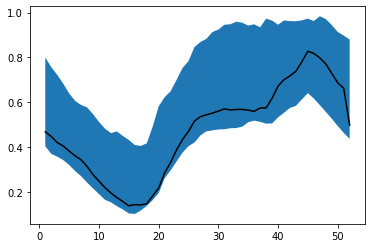

In [137]:
fig, ax = plt.subplots()
ax.fill_between(table["week"], table["max_values"], table["min_values"])
ax.plot(table["week"], table["y_values"], linestyle="-", color="black")
plt.show()